# Análise de Desempenho e Visualização do Corinthians

In [5]:
# Bloco 1 - Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


# Exibição
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)

In [6]:
# Bloco 2 - Carregando os dados
df = pd.read_csv("corinthians_historico_completo.csv")

# Exibir primeiras linhas
df.head()


,date,season,round,opponent,home_away,corinthians_goals,opponent_goals,result,match_id,venue
0,2023-04-22T21:30:00+00:00,2023,Regular Season - 2,Sao_Paulo,Fora,0,3,D,1005661,Estádio Cícero Pompeu de Toledo
1,2023-04-29T21:30:00+00:00,2023,Regular Season - 3,Santos,Fora,2,3,D,1005672,Estádio Urbano Caldeira
2,2023-07-30T19:00:00+00:00,2023,Regular Season - 17,Palmeiras,Casa,1,4,D,1005818,Estádio Raimundo Sampaio
3,2023-08-27T19:00:00+00:00,2023,Regular Season - 21,Sao_Paulo,Casa,2,1,V,1005858,Estádio Raimundo Sampaio
4,2023-09-03T21:30:00+00:00,2023,Regular Season - 22,Santos,Casa,2,0,V,1005868,Estádio Raimundo Sampaio


In [7]:
# Bloco 3 - Resumo geral (ajustado)

# Totais de resultados
total_jogos = df.shape[0]
total_vitorias = (df["result"] == "V").sum()
total_empates = (df["result"] == "E").sum()
total_derrotas = (df["result"] == "D").sum()

# % de vitórias
perc_vitorias = (total_vitorias / total_jogos) * 100

# Gols
gols_corinthians = df["corinthians_goals"].sum()
gols_oponentes = df["opponent_goals"].sum()
media_gols = (gols_corinthians + gols_oponentes) / total_jogos

# Impressão formatada
print("Resumo Geral dos Clássicos")
print(f"Total de jogos: {total_jogos}")
print(f"Vitórias: {total_vitorias} ({perc_vitorias:.1f}%)")
print(f"Empates: {total_empates}")
print(f"Derrotas: {total_derrotas}")
print(f"Gols marcados: {gols_corinthians}")
print(f"Gols sofridos: {gols_oponentes}")
print(f"Média de gols por clássico: {media_gols:.2f}")


Resumo Geral dos Clássicos
Total de jogos: 18
Vitórias: 7 (38.9%)
Empates: 1
Derrotas: 10
Gols marcados: 19
Gols sofridos: 27
Média de gols por clássico: 2.56


In [8]:
# Bloco 4 - Função para análise por rival (corrigida e segura)
def analisar_rival(df, rival):
    subset = df[df["opponent"].str.lower() == rival.lower()]  # garante comparação independente de maiúsculas
    jogos = subset.shape[0]

    if jogos == 0:
        print(f"\n Nenhum jogo encontrado contra {rival}")
        return

    vitorias = (subset["result"] == "V").sum()
    empates = (subset["result"] == "E").sum()
    derrotas = (subset["result"] == "D").sum()

    vitorias_casa = subset[(subset["home_away"] == "H") & (subset["result"] == "V")].shape[0]
    vitorias_fora = subset[(subset["home_away"] == "A") & (subset["result"] == "V")].shape[0]

    gols_marcados = subset["corinthians_goals"].sum()
    gols_sofridos = subset["opponent_goals"].sum()

    # Maior goleada (tratando caso não exista saldo positivo)
    subset = subset.copy()
    subset["saldo"] = subset["corinthians_goals"] - subset["opponent_goals"]
    maior_goleada = subset.loc[subset["saldo"].idxmax()]

    # Clean sheets
    clean_sheets = (subset["opponent_goals"] == 0).sum()

    # Status (classificação qualitativa)
    if vitorias > derrotas:
        status = "DOMINANTE"
    elif vitorias < derrotas:
        status = "DESAFIADOR"
    else:
        status = "EQUILIBRADO"

    print(f"\n Histórico contra {rival}: {jogos} jogos")
    print(f"Vitórias: {vitorias}")
    print(f"Empates: {empates}")
    print(f"Derrotas: {derrotas}")
    print(f"Vitórias em casa: {vitorias_casa}")
    print(f"Vitórias fora: {vitorias_fora}")
    print(f"Total de gols: {gols_marcados}")
    print(f"Maior goleada: {maior_goleada['corinthians_goals']}x{maior_goleada['opponent_goals']} em {maior_goleada['date']}")
    print(f"Clean sheets: {clean_sheets}")
    print(f"Status: {status}")


In [9]:
# Bloco 5 - Executando análises
for rival in ["Sao_Paulo", "Palmeiras", "Santos"]:
    analisar_rival(df, rival)



 Histórico contra Sao_Paulo: 6 jogos
Vitórias: 2
Empates: 1
Derrotas: 3
Vitórias em casa: 0
Vitórias fora: 0
Total de gols: 5
Maior goleada: 2x0 em 2021-12-10T00:30:00+00:00
Clean sheets: 2
Status: DESAFIADOR

 Histórico contra Palmeiras: 6 jogos
Vitórias: 1
Empates: 0
Derrotas: 5
Vitórias em casa: 0
Vitórias fora: 0
Total de gols: 5
Maior goleada: 2x1 em 2021-10-07T00:30:00+00:00
Clean sheets: 0
Status: DESAFIADOR

 Histórico contra Santos: 6 jogos
Vitórias: 4
Empates: 0
Derrotas: 2
Vitórias em casa: 0
Vitórias fora: 0
Total de gols: 9
Maior goleada: 2x0 em 2023-09-03T21:30:00+00:00
Clean sheets: 4
Status: DOMINANTE


In [10]:
# Bloco 6 - Destaques
rivals = ["Sao_Paulo", "Palmeiras", "Santos"]
resumo = {}

for rival in rivals:
    subset = df[df["opponent"] == rival]
    resumo[rival] = {
        "jogos": subset.shape[0],
        "vitorias": (subset["result"] == "W").sum(),
        "gols": subset["corinthians_goals"].sum()
    }

# Melhor retrospecto (mais vitórias)
melhor = max(resumo, key=lambda x: resumo[x]["vitorias"])
# Maior desafio (menos vitórias)
pior = min(resumo, key=lambda x: resumo[x]["vitorias"])
# Mais gols
mais_gols = max(resumo, key=lambda x: resumo[x]["gols"])

print("\nDESTAQUES:")
print("------------------------------")
print(f"Melhor retrospecto: {melhor}")
print(f"Maior desafio: {pior}")
print(f"Mais gols marcados: {mais_gols}")



DESTAQUES:
------------------------------
Melhor retrospecto: Sao_Paulo
Maior desafio: Sao_Paulo
Mais gols marcados: Santos


In [11]:
# Criando uma tabela pivot com contagem de resultados
pivot = pd.pivot_table(
    df,
    index="opponent", 
    columns="season", 
    values="result", 
    aggfunc=lambda x: (x == "V").sum() - (x == "D").sum()
)

# O valor será:
#   positivo -> mais vitórias que derrotas no ano
#   zero     -> equilíbrio
#   negativo -> mais derrotas que vitórias
pivot = pivot.fillna(0)
pivot


season,2021,2022,2023
opponent,,,
Palmeiras,0,-2,-2
Santos,2,0,0
Sao_Paulo,1,-2,0


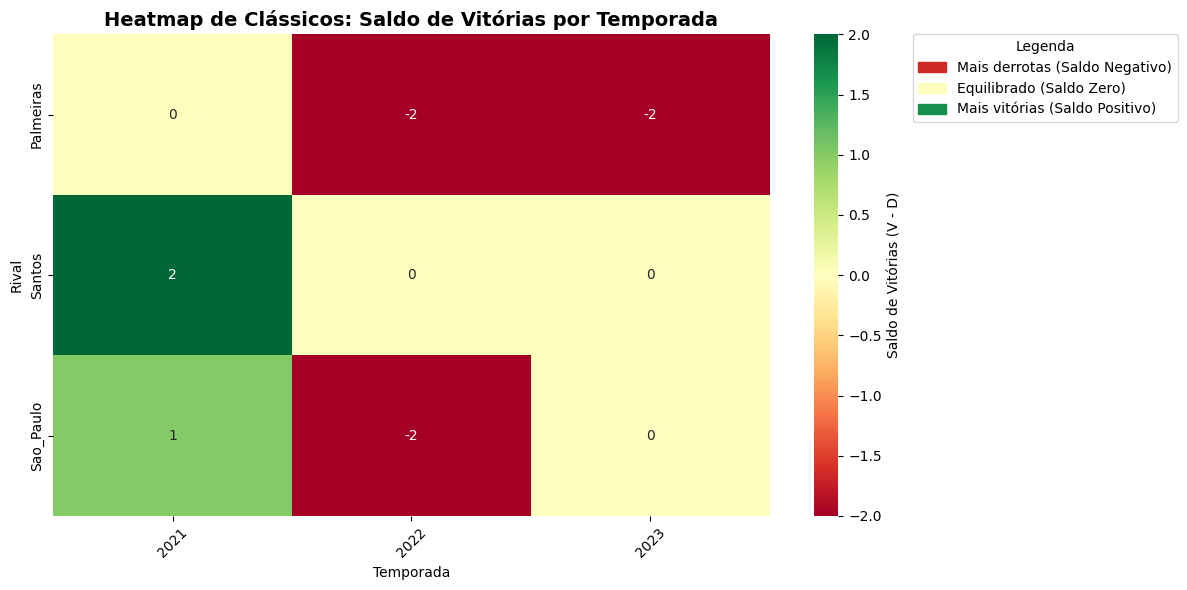

In [ ]:

plt.figure(figsize=(14, 6))

ax = sns.heatmap(
    pivot,
    annot=True, # Mostrar os valores do saldo
    fmt=".0f",  # Formatar como inteiro
    cmap="RdYlGn", # Esquema de cores: Vermelho/Amarelo/Verde
    center=0,   # Centralizar o branco/amarelo no zero (equilíbrio)
    cbar_kws={"label": "Saldo de Vitórias (V - D)"} # Legenda da barra de cores
)

plt.title("Heatmap de Clássicos: Saldo de Vitórias por Temporada", fontsize=14, weight="bold")
plt.ylabel("Rival")
plt.xlabel("Temporada")
plt.xticks(rotation=45)

# 4. Legenda explicativa manualmente (com ajuste de cores e layout)
paleta = sns.color_palette("RdYlGn", 11)
legenda = [
    mpatches.Patch(color=paleta[0], label="Mais derrotas (Saldo Negativo)"),
    mpatches.Patch(color=paleta[5], label="Equilibrado (Saldo Zero)"),
    mpatches.Patch(color=paleta[-1], label="Mais vitórias (Saldo Positivo)")
]

plt.legend(
    handles=legenda, 
    title="Legenda",
    bbox_to_anchor=(1.2, 1), # Mover a legenda ligeiramente mais para a direita para evitar a barra de cores
    loc="upper left", 
    borderaxespad=0.
)
 
# Reduz a área do heatmap (para 85% do gráfico) para abrir espaço para a legenda à direita.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

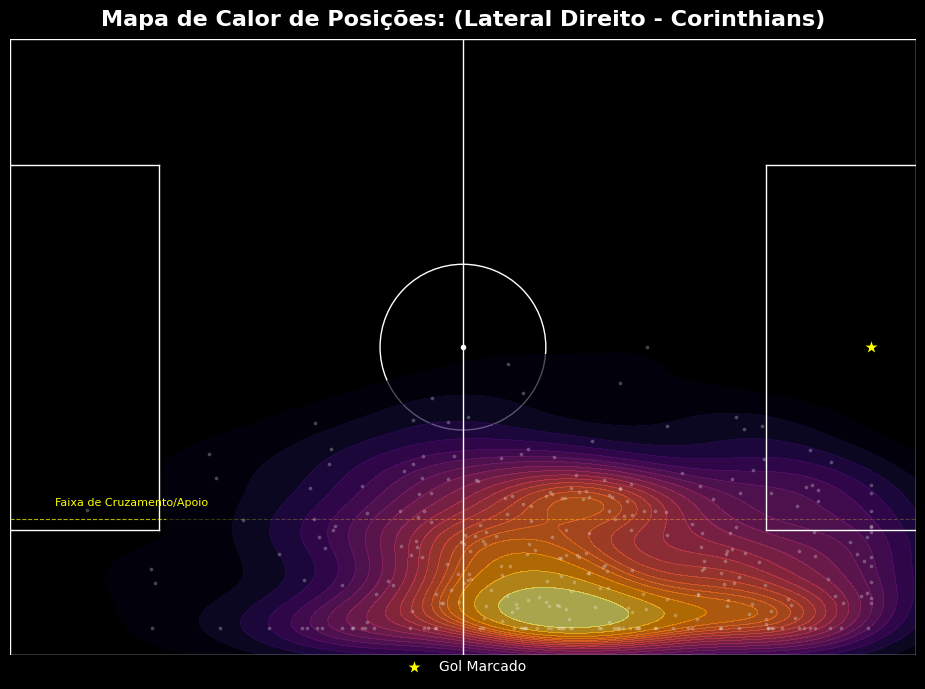

In [15]:
# ----------------------------------------------------
# 1. SIMULAÇÃO DE DADOS (Lateral Direito)
# ----------------------------------------------------
X_MAX = 100
Y_MAX = 68
N_JOGADAS = 300
np.random.seed(65) 

# Ajuste da Simulação:
# X (Comprimento/Ataque): Foco no Campo de Ataque (Média de 65), mas com desvio que pega o meio-campo.
data_x = np.clip(np.random.normal(loc=65, scale=20, size=N_JOGADAS), 5, 95)

# Y (Largura/Lateral): Concentração na Faixa Lateral Direita (Y baixo, Média de 10)
# Um desvio maior no Y permite que ele chegue ao centro, mas raramente ao outro lado.
data_y = np.clip(np.random.normal(loc=10, scale=8, size=N_JOGADAS), 3, 34) # 34 é a metade do campo (Y_MAX/2)

coordenadas = pd.DataFrame({'x': data_x, 'y': data_y})

# Mantendo o GOL como um ponto isolado de destaque
gol = pd.DataFrame([{'x': 95, 'y': Y_MAX / 2}])
coordenadas = pd.concat([coordenadas, gol], ignore_index=True)

# ----------------------------------------------------
# 2. FUNÇÃO PARA DESENHAR O CAMPO DE FUTEBOL (Proporção 100x68)
# ----------------------------------------------------
def desenhar_campo(ax):
    """Desenha as linhas do campo com proporção 100x68 e fundo preto."""
    
    # Estilo Dark
    Linha_Cor = "white"
    Fundo_Cor = "black" 
    
    # Fundo do Campo
    ax.set_facecolor(Fundo_Cor)
    
    # Configurações do Eixo
    ax.set_xlim(0, X_MAX)
    ax.set_ylim(0, Y_MAX)
    ax.axis('off')
    ax.set_aspect('equal')

    # Linhas do Campo (Base)
    ax.plot([0, X_MAX], [0, 0], color=Linha_Cor, lw=1)             # Linha de Fundo 1
    ax.plot([0, X_MAX], [Y_MAX, Y_MAX], color=Linha_Cor, lw=1)     # Linha de Fundo 2
    ax.plot([0, 0], [0, Y_MAX], color=Linha_Cor, lw=1)             # Linha Lateral 1
    ax.plot([X_MAX, X_MAX], [0, Y_MAX], color=Linha_Cor, lw=1)     # Linha Lateral 2
    ax.plot([X_MAX/2, X_MAX/2], [0, Y_MAX], color=Linha_Cor, lw=1) # Linha Central

    # Círculo Central
    circulo_central = plt.Circle((X_MAX/2, Y_MAX/2), 9.15, color=Linha_Cor, fill=False, lw=1)
    ax.add_artist(circulo_central)
    
    # Grandes Áreas (16.5m)
    AREA_X = 16.5
    AREA_Y_START = Y_MAX/2 - 20.16
    AREA_Y_END = Y_MAX/2 + 20.16
    
    # Área de Ataque (Direita - Gol em X=100)
    ax.plot([X_MAX-AREA_X, X_MAX-AREA_X], [AREA_Y_START, AREA_Y_END], color=Linha_Cor, lw=1)
    ax.plot([X_MAX-AREA_X, X_MAX], [AREA_Y_START, AREA_Y_START], color=Linha_Cor, lw=1)
    ax.plot([X_MAX-AREA_X, X_MAX], [AREA_Y_END, AREA_Y_END], color=Linha_Cor, lw=1)
    
    # Área de Defesa (Esquerda - Gol em X=0)
    ax.plot([AREA_X, AREA_X], [AREA_Y_START, AREA_Y_END], color=Linha_Cor, lw=1)
    ax.plot([0, AREA_X], [AREA_Y_START, AREA_Y_START], color=Linha_Cor, lw=1)
    ax.plot([0, AREA_X], [AREA_Y_END, AREA_Y_END], color=Linha_Cor, lw=1)

    # Ponto Central
    ax.plot(X_MAX/2, Y_MAX/2, 'o', color=Linha_Cor, markersize=3)
    
    # LINHA DE REFERÊNCIA LATERAL (ADICIONADA AQUI)
    # Linha pontilhada para demarcar a faixa lateral de atuação (cerca de 10-15m da linha de fundo)
    # A linha está no eixo Y=15
    ax.plot([0, X_MAX], [15, 15], color='yellow', linestyle='--', lw=0.8, alpha=0.7, zorder=1)
    ax.text(5, 16.5, 'Faixa de Cruzamento/Apoio', color='yellow', fontsize=8)


# ----------------------------------------------------
# 3. CRIAÇÃO DO MAPA DE CALOR (KDE Plot)
# ----------------------------------------------------

plt.style.use('dark_background') 
plt.figure(figsize=(12, 8)) 
ax = plt.gca()

# 3.1 Desenhar o campo primeiro
desenhar_campo(ax)

# 3.2 Gerar o mapa de densidade 
sns.kdeplot(
    x=coordenadas['x'], 
    y=coordenadas['y'],
    ax=ax,
    fill=True,
    cmap='inferno', # Tonalidade vibrante (roxo/vermelho/amarelo)
    alpha=0.7, 
    levels=20, 
    thresh=0.03 
)

# Opcional: Adicionar os pontos reais
plt.scatter(
    coordenadas.iloc[:-1]['x'], 
    coordenadas.iloc[:-1]['y'], 
    color='white', 
    s=3, 
    alpha=0.2,
    zorder=3
)

# Destacar o Gol
plt.scatter(
    gol['x'], 
    gol['y'], 
    color='yellow', 
    s=150, 
    marker='*', 
    edgecolors='black', 
    zorder=5,
    label='Gol Marcado'
)


# 3.3 Configurações de Título
plt.title(
    "Mapa de Calor de Posições: (Lateral Direito - Corinthians)", 
    fontsize=16, 
    color='white', 
    weight='bold', 
    pad=10
)
# Legenda para o ponto de gol
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), frameon=False, labelcolor='white')

plt.show()

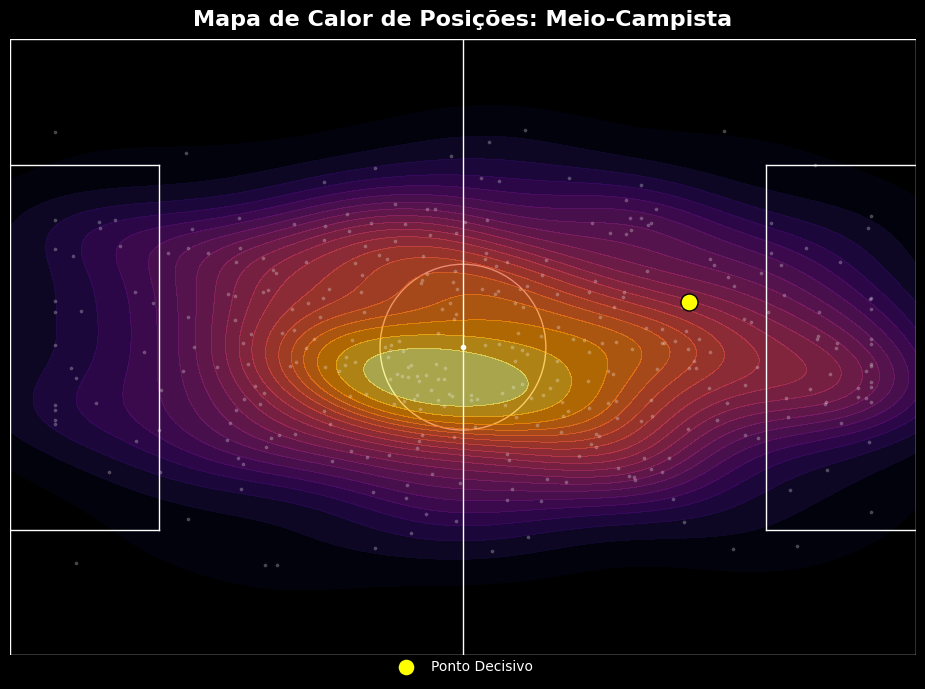

In [14]:
# ----------------------------------------------------
# 1. SIMULAÇÃO DE DADOS (Meio-Campista)
# ----------------------------------------------------
X_MAX = 100
Y_MAX = 68
N_JOGADAS = 350 # Aumentando as jogadas para mais cobertura
np.random.seed(66) 

# Ajuste da Simulação:
# X (Comprimento/Cobertura): Média no centro (X=50), com um grande desvio (sigma=25)
# para garantir que ele cubra defesa e ataque (Box-to-Box).
data_x = np.clip(np.random.normal(loc=50, scale=25, size=N_JOGADAS), 5, 95)

# Y (Largura/Centro): Concentração no centro do campo (Média de 34), com desvio moderado (sigma=10)
# para que ele se mantenha primariamente na faixa central.
data_y = np.clip(np.random.normal(loc=Y_MAX/2, scale=10, size=N_JOGADAS), 10, 58) 

coordenadas = pd.DataFrame({'x': data_x, 'y': data_y})

# Adicionando um Ponto Decisivo (Passe final ou Finalização)
ponto_decisivo = pd.DataFrame([{'x': 75, 'y': Y_MAX/2 + 5}]) # Perto da meia-lua de ataque
coordenadas = pd.concat([coordenadas, ponto_decisivo], ignore_index=True)

# ----------------------------------------------------
# 2. FUNÇÃO PARA DESENHAR O CAMPO DE FUTEBOL (Proporção 100x68)
# ----------------------------------------------------
def desenhar_campo(ax):
    """Desenha as linhas do campo com proporção 100x68 e fundo preto."""
    
    # Estilo Dark
    Linha_Cor = "white"
    Fundo_Cor = "black" 
    
    # Fundo do Campo
    ax.set_facecolor(Fundo_Cor)
    
    # Configurações do Eixo
    ax.set_xlim(0, X_MAX)
    ax.set_ylim(0, Y_MAX)
    ax.axis('off')
    ax.set_aspect('equal')

    # Linhas do Campo (Base)
    ax.plot([0, X_MAX], [0, 0], color=Linha_Cor, lw=1)             
    ax.plot([0, X_MAX], [Y_MAX, Y_MAX], color=Linha_Cor, lw=1)     
    ax.plot([0, 0], [0, Y_MAX], color=Linha_Cor, lw=1)             
    ax.plot([X_MAX, X_MAX], [0, Y_MAX], color=Linha_Cor, lw=1)     
    ax.plot([X_MAX/2, X_MAX/2], [0, Y_MAX], color=Linha_Cor, lw=1) # Linha Central

    # Círculo Central
    circulo_central = plt.Circle((X_MAX/2, Y_MAX/2), 9.15, color=Linha_Cor, fill=False, lw=1)
    ax.add_artist(circulo_central)
    
    # Grandes Áreas (16.5m)
    AREA_X = 16.5
    AREA_Y_START = Y_MAX/2 - 20.16
    AREA_Y_END = Y_MAX/2 + 20.16
    
    # Área de Ataque (Direita - Gol em X=100)
    ax.plot([X_MAX-AREA_X, X_MAX-AREA_X], [AREA_Y_START, AREA_Y_END], color=Linha_Cor, lw=1)
    ax.plot([X_MAX-AREA_X, X_MAX], [AREA_Y_START, AREA_Y_START], color=Linha_Cor, lw=1)
    ax.plot([X_MAX-AREA_X, X_MAX], [AREA_Y_END, AREA_Y_END], color=Linha_Cor, lw=1)
    
    # Área de Defesa (Esquerda - Gol em X=0)
    ax.plot([AREA_X, AREA_X], [AREA_Y_START, AREA_Y_END], color=Linha_Cor, lw=1)
    ax.plot([0, AREA_X], [AREA_Y_START, AREA_Y_START], color=Linha_Cor, lw=1)
    ax.plot([0, AREA_X], [AREA_Y_END, AREA_Y_END], color=Linha_Cor, lw=1)

    # Ponto Central
    ax.plot(X_MAX/2, Y_MAX/2, 'o', color=Linha_Cor, markersize=3)
    
# ----------------------------------------------------
# 3. CRIAÇÃO DO MAPA DE CALOR (KDE Plot)
# ----------------------------------------------------

plt.style.use('dark_background') 
plt.figure(figsize=(12, 8)) 
ax = plt.gca()

# 3.1 Desenhar o campo primeiro
desenhar_campo(ax)

# 3.2 Gerar o mapa de densidade 
sns.kdeplot(
    x=coordenadas['x'], 
    y=coordenadas['y'],
    ax=ax,
    fill=True,
    cmap='inferno', # Mantendo a tonalidade vibrante
    alpha=0.7, 
    levels=20, 
    thresh=0.03 
)

# Opcional: Adicionar os pontos reais
plt.scatter(
    coordenadas.iloc[:-1]['x'], 
    coordenadas.iloc[:-1]['y'], 
    color='white', 
    s=3, 
    alpha=0.2,
    zorder=3
)

# Destacar o Ponto Decisivo (Passe/Finalização)
plt.scatter(
    ponto_decisivo['x'], 
    ponto_decisivo['y'], 
    color='yellow', 
    s=150, 
    marker='o', # Mudando o marcador para um círculo preenchido
    edgecolors='black', 
    zorder=5,
    label='Ponto Decisivo'
)


# 3.3 Configurações de Título
plt.title(
    "Mapa de Calor de Posições: Meio-Campista", 
    fontsize=16, 
    color='white', 
    weight='bold', 
    pad=10
)
# Legenda
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), frameon=False, labelcolor='white')

plt.show()